In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
xl = pd.ExcelFile("data.xlsx")

In [3]:
xl.sheet_names

[u'Tabelle1', u'Tabelle2', u'Tabelle3']

In [4]:
df = xl.parse("Tabelle1")
df.head(2)

,date,bestSpot,avgDistance,milano interpolated pressure,trappes interpolated pressure,stuttgart interpolated pressure,muenchen interpolated pressure,payerne interpolated pressure,milano interpolated temp,trappes interpolated temp,...,milano interpolated tempGradient,trappes interpolated tempGradient,stuttgart interpolated tempGradient,muenchen interpolated tempGradient,payerne interpolated tempGradient,milano interpolated windSpeed,trappes interpolated windSpeed,stuttgart interpolated windSpeed,muenchen interpolated windSpeed,payerne interpolated windSpeed
0,2017-03-14,NaN,NaN,"960.97, 951.12, 941.26, 931.41, 895.1, 890.71,...","966.53, 956.57, 946.61, 936.65, 926.69, 890.82...","970.26, 948.46, 940.74, 933.02, 921.53, 911.61...","957.26, 954.71, 938.83, 931.54, 922.36, 911.36...","968.54, 957.61, 945.78, 930.06, 923.56, 910.02...","9.01, 8.46, 7.91, 7.36, 6.24, 6.12, 6.01, 5.9,...","6.04, 5.69, 5.35, 5, 4.66, 4.66, 4.67, 4.68, 4...",...,"0.55, 0.55, 0.55, 1.12, 0.12, 0.11, 0.11, 0.48...","0.35, 0.34, 0.35, 0.34, 0, -0.01, -0.01, -0.01...","0.89, 0.33, 0.33, 0.64, 0.62, 0.62, 1.25, 0.41...","-0.52, 0.77, 0.44, 0.6, 0.64, 0.65, 1.57, 0.33...","-2.43, -0.59, -0.01, 0.06, 0.88, 0.76, 0.75, 0...","5.56, 5.96, 6.35, 6.74, 4.46, 4.08, 3.71, 3.33...","6.34, 6.74, 7.14, 7.53, 7.93, 9.29, 9.47, 9.65...","4.98, 7.56, 8.48, 9.4, 11.72, 13.79, 15.86, 13...","4.98, 5.78, 8.17, 9.21, 10.08, 10.4, 10.72, 11...","1, 3.28, 5.64, 10.65, 11.64, 10.2, 9.46, 8.72,..."
1,2017-03-15,Fanas,60.529091,"961.53, 951.81, 942.1, 932.38, 904.63, 901.63,...","967.03, 957.07, 947.11, 937.15, 927.19, 884.68...","970.24, 959.49, 946.46, 934.75, 926.42, 914.29...","959.34, 956.81, 943.52, 932.18, 925.32, 912.78...","971.91, 959.48, 945.77, 935.22, 926.01, 911.2,...","12.57, 12.26, 11.95, 11.64, 10.19, 10.02, 9.84...","6.75, 6.43, 6.11, 5.79, 5.47, 7.01, 7.24, 7.46...",...,"0.31, 0.31, 0.31, 1.45, 0.17, 0.18, 0.21, 0.05...","0.32, 0.32, 0.32, 0.32, -1.54, -0.23, -0.22, -...","0.23, 0.75, 0.8, 0.58, 0.78, 1.12, 0.6, -0.26,...","-0.35, 0.65, 0.63, 0.38, 1.02, 0.83, 0.64, 0.3...","-4.18, -1.42, -0.25, 0.66, 1.1, 0.71, 0.71, 0....","4.49, 4.36, 4.23, 4.1, 8.53, 9.19, 9.86, 16.12...","7.56, 7.43, 7.29, 7.16, 7.03, 7, 7, 7, 7, 7, 7...","14.78, 14.14, 11.21, 11.51, 11.93, 10.05, 8.9,...","6.96, 7.75, 9.39, 11.45, 12, 10.12, 8.53, 10.8...","2.12, 3.14, 11.94, 14, 14, 15.81, 15.59, 15.38..."


In [5]:
df.groupby('bestSpot').describe()

avgDistance                                      \
                              count        mean         std         min   
bestSpot                                                                  
?                               1.0    6.567778         NaN    6.567778   
Amisbühl                        6.0   16.944821    9.370696    3.840000   
Balderen                        4.0   19.456437    6.875515   12.115000   
Bellwald                        1.0    8.266667         NaN    8.266667   
Brentaz                         1.0   15.623500         NaN   15.623500   
Brunni                          8.0   30.877982   11.586440   11.140000   
Bözingenberg                    1.0   56.832500         NaN   56.832500   
Büelen                          1.0   17.197500         NaN   17.197500   
Cabane de Tracuit               1.0    8.286923         NaN    8.286923   
Chaumont                        1.0   18.133333         NaN   18.133333   
Chrüz                           1.0  105.017500         NaN  105.017500   
Cimetta                         3.0   96.192333  100.486441   17.865000   
Cret du Midi                    1.0   12.725714         NaN   12.725714   
Ebenalp                         1.0   35.451304         NaN   35.451304   
Fanas                          15.0   80.953193   56.771616    6.200000   
Fiesch                         17.0   82.087159   31.571248   25.244000   
Gana                            2.0   16.295000   11.943034    7.850000   
Hüsliberg                       1.0   14.557500         NaN   14.557500   
Jungfrau                        1.0   16.390000         NaN   16.390000   
Lai Alv                         3.0   63.440176   28.714736   30.880000   
Marbachegg                      4.0   17.679182    5.673844   10.890000   
Mentschelen                     1.0   18.386250         NaN   18.386250   
Metschstand                     1.0    5.756842         NaN    5.756842   
Mornera                         2.0  126.191917  124.272228   38.318182   
Niederbauen                     1.0    4.996000         NaN    4.996000   
Niederhorn                      1.0   11.310000         NaN   11.310000   
Niederwiler Stierenberg         1.0   63.006000         NaN   63.006000   
Niesen                         11.0  114.552244   49.878569   16.545714   
Ob Lucken                       1.0   16.930000         NaN   16.930000   
Oberrieden                      1.0   15.565000         NaN   15.565000   
Pizol                           1.0   13.450000         NaN   13.450000   
Planplatten                     1.0   27.096364         NaN   27.096364   
Riederalp                       1.0  220.673750         NaN  220.673750   
Rütiberg                        1.0    5.403333         NaN    5.403333   
Schwängimatt                    2.0   28.640625   23.109133   12.300000   
Sonchaux                        1.0   15.192000         NaN   15.192000   
Sorebois                        1.0    4.542500         NaN    4.542500   
Sta.Maria I.C                   1.0    4.112500         NaN    4.112500   
Verbier                         2.0   12.763810    3.181307   10.514286   
Vounetz                         2.0   28.582769    2.416565   26.874000   
Weissenstein                   28.0   54.138300   20.510634   27.120000   
Zugerberg                       1.0    8.642000         NaN    8.642000   

                                                                         
                                25%         50%         75%         max  
bestSpot                                                                 
?                          6.567778    6.567778    6.567778    6.567778  
Amisbühl                  13.565982   16.590714   18.810000   32.540000  
Balderen                  16.582750   18.497875   21.371562   28.715000  
Bellwald                   8.266667    8.266667    8.266667    8.266667  
Brentaz                   15.623500   15.623500   15.623500   15.623500  
Brunni                    23.826750   30.977465   38.670

In [6]:
pl = df[df['bestSpot']=='Weissenstein']
# pl.head()
# df.iloc[:,19][0]

In [7]:
print(pl.iloc[:,19].str.split(',', expand=True)[:-1].describe())
wind = np.array(pl.iloc[:,19].str.split(',', expand=True)[:-1])

           0       1      2      3       4       5      6      7       8   \
count      27      27     27     27      27      27     27     27      27   
unique     27      27     27     27      27      27     27     27      27   
top     11.03   20.05   4.35   4.79   15.06   11.89   5.03   13.1   16.63   
freq        1       1      1      1       1       1      1      1       1   

         9  ...      36      37      38      39     40      41      42  \
count    27 ...      27      27      27      27     27      27      27   
unique   26 ...      27      27      27      27     27      27      27   
top      21 ...   10.06   23.97   20.59   20.48   28.6   17.99   21.21   
freq      2 ...       1       1       1       1      1       1       1   

            43      44  45  
count       27      27  27  
unique      27      27   1  
top      16.94   29.65      
freq         1       1  27  

[4 rows x 46 columns]


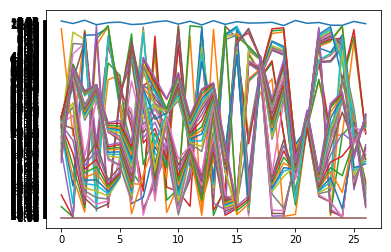

In [8]:
plt.plot(wind[:])
plt.show()

46
             avgDistance
avgDistance          1.0
[ 279.92  302.86  316.32  331.34  356.76  358.73  361.77  359.63  362.24
  365.01  369.1   380.98  388.94  395.92  403.94  411.25  408.21  418.13
  420.77  428.67  424.64  435.73  441.67  448.65  452.45  466.23  493.01
  525.66  536.78  547.28  557.77  568.26  578.75  591.18  594.19  608.48
  616.22  625.63  632.47  641.73  652.18  664.44  671.97  679.62  686.72]


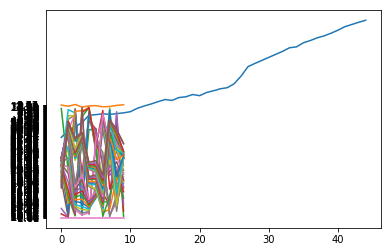

In [9]:
print(len(wind[0]))
avg = np.zeros(45)
print(pl.corr())
for i in range(45):
    for j in range(len(wind)):
        avg[i] = avg[i] + float(wind[j][i])
print(avg)
plt.plot(avg)
plt.plot(wind)
plt.show()

In [10]:
#removing places for which frequency is very less 
freq = df['bestSpot'].value_counts()
print(freq)
to_remove = freq[freq<7].index
df['bestSpot'].replace(to_remove,None,inplace = True)
df = df.dropna()
df.index = range(df.shape[0])

colList = list(df)
y = df.iloc[:,:3] #outputs date,bestspot,avgDistance
print(list(y))
param_df = df.iloc[:,3:]  #inputs

#encoding bestSpotCities in number 
labels = {}
freq = y['bestSpot'].value_counts()
print(freq)
freq = freq.index.values
for i,city in enumerate(freq):
    labels[city] = i
print(labels)
y_city = [labels[city] for city in y['bestSpot']]
y_city = np.array(y_city)
y_avgDistance = y['avgDistance']

Weissenstein               28
Fiesch                     17
Fanas                      15
Niesen                     11
Brunni                      8
Amisbühl                    6
Balderen                    4
Marbachegg                  4
Cimetta                     3
Lai Alv                     3
Gana                        2
Schwängimatt                2
Vounetz                     2
Verbier                     2
Mornera                     2
Metschstand                 1
Niederhorn                  1
Riederalp                   1
Brentaz                     1
Niederwiler Stierenberg     1
Mentschelen                 1
Cabane de Tracuit           1
Chrüz                       1
Pizol                       1
Cret du Midi                1
?                           1
Sorebois                    1
Chaumont                    1
Jungfrau                    1
Hüsliberg                   1
Bözingenberg                1
Ebenalp                     1
Ob Lucken                   1
Rütiberg  